2602160750 - Bryan Orville Audric - Quiz No 2 & 3

In [ ]:
path = "/content/drive/MyDrive/Dataset/Mark.txt"

In [ ]:
import pandas as pd
import numpy as np
Dataset = pd.read_csv(path)

In [ ]:
Dataset.head()

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


Making a proper dataframe

In [ ]:
columns = ['Nilai_Test_1', 'Nilai_Test_2', 'Lulus']
Dataset = pd.read_csv(path,header=None)
Dataset.columns = columns

In [ ]:
Dataset.head()

,Nilai_Test_1,Nilai_Test_2,Lulus
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


There are 99 rows of data with 2 features

In [ ]:
Dataset.shape

(100, 3)

Exploratory Data Analysis

<Axes: xlabel='Nilai_Test_1', ylabel='Nilai_Test_2'>

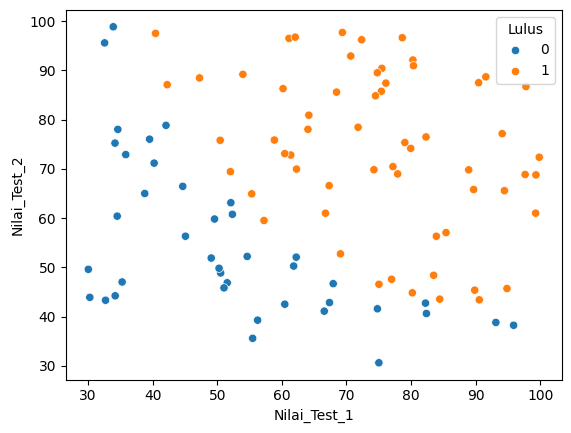

In [ ]:
import seaborn as sns

sns.scatterplot(x="Nilai_Test_1",y="Nilai_Test_2",hue="Lulus",data=Dataset)

<Axes: >

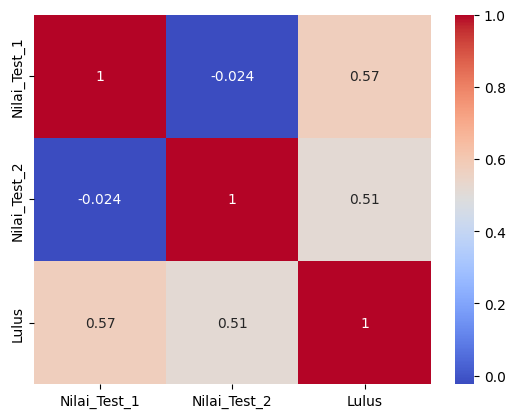

In [ ]:
sns.heatmap(Dataset.corr(),annot=True,cmap='coolwarm')

Preprocessing

Check for missing value

In [ ]:
Dataset.isnull().sum()

Nilai_Test_1    0
Nilai_Test_2    0
Lulus           0
dtype: int64

Splitting Dataset into feature and label

In [ ]:
x = Dataset.drop(columns=['Lulus']).values
y = Dataset['Lulus'].values

Min max scaling

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

Splitting Dataset into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2, random_state = 42)

Logistic Regression Model

In [ ]:
def sigmoid(input):
    return 1.0 / (1 + np.exp(-input))

# Gradient descent based logistic regression from scratch
def compute_prediction(X, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

def update_weights_gd(X_train, y_train, weights, learning_rate):
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m = y_train.shape[0]
    weights += learning_rate / float(m) * weights_delta
    return weights

def compute_cost(X, y, weights):
    predictions = compute_prediction(X, weights)
    cost = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
    return cost

def train_logistic_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    cost_history = [0] * max_iter
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        cost_history[iteration] = compute_cost(X_train, y_train, weights)
        # Check the cost for every 100 (for example) iterations
        if iteration % 1000 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights, cost_history

def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)


Training the testing dataset

In [ ]:
weights, cost_ = train_logistic_regression(x_train, y_train, max_iter=10000, learning_rate=0.5, fit_intercept=True)

0.6737703222332028
0.22344185816247406
0.19501926033916653
0.18438801719854755
0.17897148779060162
0.17579210213088997
0.1737656548140328
0.17240233025303658
0.17144943930758844
0.17076426879519402


Predicting using testing dataset

In [ ]:
y_predict = predict(x_test,weights)
print(y_predict)

[1.56891585e-01 1.28474086e-03 3.04286122e-05 1.18446138e-01
 3.15061651e-03 2.11244012e-02 5.06089779e-03 9.99449425e-01
 9.48523339e-01 3.94590115e-02 9.99622770e-01 8.64322013e-01
 8.45395849e-01 2.84543044e-01 9.99959477e-01 9.98250556e-01
 8.47098861e-01 4.90794787e-01 9.99332074e-01 9.85508243e-01]


In [ ]:
prediction = (y_predict>=.5).astype(int)
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

Evaluation of logistic regression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy: ",accuracy_score(y_test,prediction))
print("Precision: ",precision_score(y_test,prediction))
print("Recall: ",recall_score(y_test,prediction))
print("F1 Score: ",f1_score(y_test,prediction))

Accuracy:  0.8
Precision:  0.9
Recall:  0.75
F1 Score:  0.8181818181818182


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_Matrix = confusion_matrix(y_test,prediction)
print(confusion_Matrix)

[[7 1]
 [3 9]]


<Axes: >

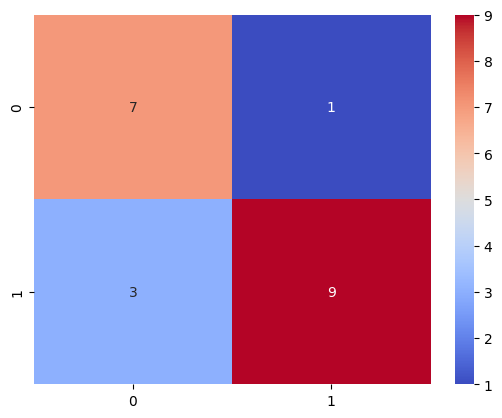

In [ ]:
sns.heatmap(confusion_Matrix, annot=True, cmap = 'coolwarm')

Based on the confusion matrix above, there are:
*   9 true positive data
*   7 true negative data
*   1 false positive data
*   3 false negative data

This basically means there are 16 data that is correctly predicted and the rest is incorrectly predicted.

No 3. Using Naive Bayes Classifier from sklearn

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier_Gaussian = GaussianNB()
classifier_Gaussian.fit(x_train,y_train)
y_pred_Gaussian = classifier_Gaussian.predict(x_test)



Evaluation of Naive Bayes Classifier from sklearn

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy: ",accuracy_score(y_test,y_pred_Gaussian))
print("Precision: ",precision_score(y_test,y_pred_Gaussian))
print("Recall: ",recall_score(y_test,y_pred_Gaussian))
print("F1 Score: ",f1_score(y_test,y_pred_Gaussian))


Accuracy:  0.8
Precision:  0.9
Recall:  0.75
F1 Score:  0.8181818181818182


In [ ]:
confusion_Matrix = confusion_matrix(y_test,y_pred_Gaussian)
print(confusion_Matrix)

[[7 1]
 [3 9]]


<Axes: >

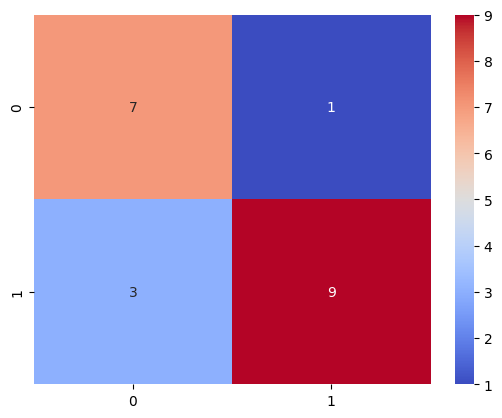

In [ ]:
sns.heatmap(confusion_Matrix, annot=True, cmap = 'coolwarm')

Based on the confusion matrix above, there are:
*   9 true positive data
*   7 true negative data
*   1 false positive data
*   3 false negative data

This basically means there are 16 data that is correctly predicted and the rest is incorrectly predicted.

\Insights:
The performance of logistic regression(from scratch) and Naive bayes classifier are equal